## Data Understanding and Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('BikeSharingDataset.csv')

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dataset.shape

(730, 16)

In [5]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Assigning string values to different seasons instead of numeric values
# 1 - Spring
dataset.loc[(dataset['season'] == 1), 'season'] = 'spring'
# 2 - Summer
dataset.loc[(dataset['season'] == 2), 'season'] = 'summer'
# 1 - fall
dataset.loc[(dataset['season'] == 3), 'season'] = 'fall'
# 1 - winter
dataset.loc[(dataset['season'] == 4), 'season'] = 'winter'

C:\Users\91797\AppData\Local\Temp\ipykernel_18552\1978631717.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'spring' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['season'] == 1), 'season'] = 'spring'


In [9]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [10]:
# 0 -> 2018, 1 -> 2019 : Year
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [11]:
def object_map_months(x):
    return x.map({
        1 : 'Jan',
        2 : 'Feb',
        3 : 'Mar',
        4 : 'Apr',
        5 : 'May',
        6 : 'Jun',
        7 : 'Jul',
        8 : 'Aug',
        9 : 'Sep',
        10 : 'Oct',
        11 : 'Nov',
        12 : 'Dec',
    })

In [12]:
dataset[['mnth']] = dataset[['mnth']].apply(object_map_months)

In [13]:
dataset['mnth'].astype('category').value_counts()

mnth
Aug    62
Dec    62
Jul    62
Jan    62
Oct    62
May    62
Mar    62
Apr    60
Nov    60
Jun    60
Sep    60
Feb    56
Name: count, dtype: int64

In [14]:
dataset['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [15]:
def str_map_weekday(x):
    return x.map({
        1 : 'Mon',
        2 : 'Tue',
        3 : 'Wed',
        4 : 'Thr',
        5 : 'Fri',
        6 : 'Sat',
        0 : 'Sun'
    })

In [16]:
dataset[['weekday']] = dataset[['weekday']].apply(str_map_weekday)

In [17]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon    105
Sat    105
Sun    105
Fri    104
Thr    104
Tue    104
Wed    103
Name: count, dtype: int64

In [18]:
dataset['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [19]:
# 1 - clear, few cloud, partly cloud
dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'A'
# 2 - Mist, Cloudy
dataset.loc[(dataset['weathersit'] == 2), 'weathersit'] = 'B'
# 3 - Light, Snow, Heavy Rain
dataset.loc[(dataset['weathersit'] == 3), 'weathersit'] = 'C'

C:\Users\91797\AppData\Local\Temp\ipykernel_18552\3851316079.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'A'


In [20]:
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,Dec,0,Thr,1,B,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,Dec,0,Fri,1,B,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,Dec,0,Sat,0,B,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,Dec,0,Sun,0,A,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [21]:
dataset['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

## Data Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91797\AppData\Local\Temp\ipykernel_18552\4114729198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['temp'])


<Axes: xlabel='temp', ylabel='Density'>

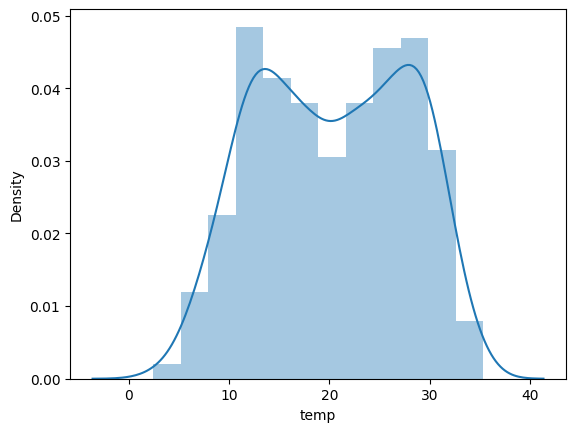

In [23]:
sns.distplot(dataset['temp'])

C:\Users\91797\AppData\Local\Temp\ipykernel_18552\455683093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['atemp'])


<Axes: xlabel='atemp', ylabel='Density'>

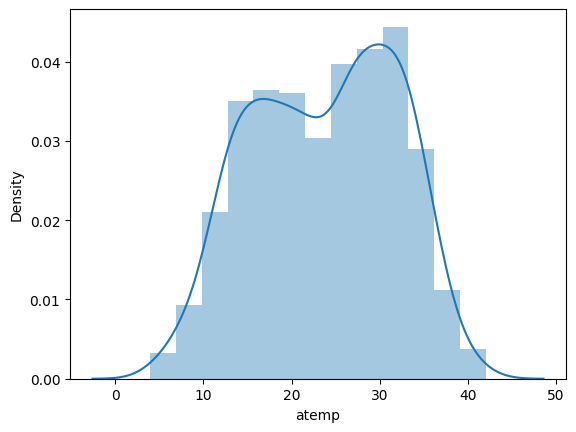

In [24]:
sns.distplot(dataset['atemp'])

C:\Users\91797\AppData\Local\Temp\ipykernel_18552\123344219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['windspeed'])


<Axes: xlabel='windspeed', ylabel='Density'>

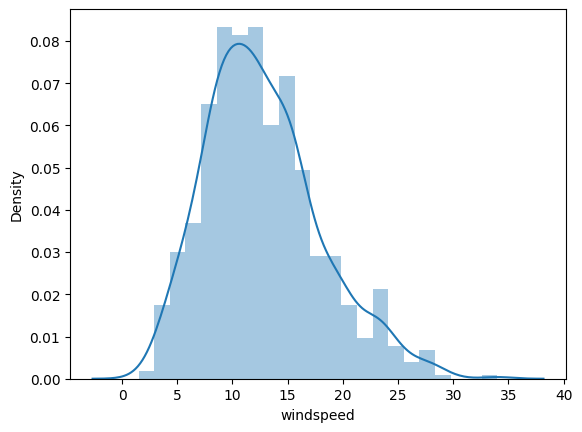

In [25]:
sns.distplot(dataset['windspeed'])

C:\Users\91797\AppData\Local\Temp\ipykernel_18552\2381230678.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['cnt'])


<Axes: xlabel='cnt', ylabel='Density'>

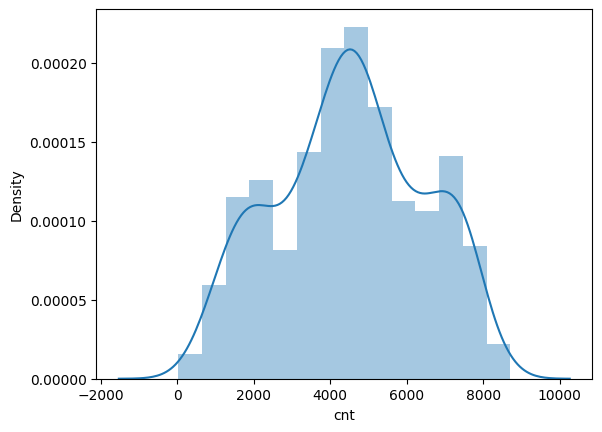

In [26]:
# Target Variable: Count of total rental bikes including both casual and registered
sns.distplot(dataset['cnt'])

In [27]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [28]:
dataset_categorical = dataset.select_dtypes(exclude = ['float64', 'datetime64[ns]', 'int64'])

In [29]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [30]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thr,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


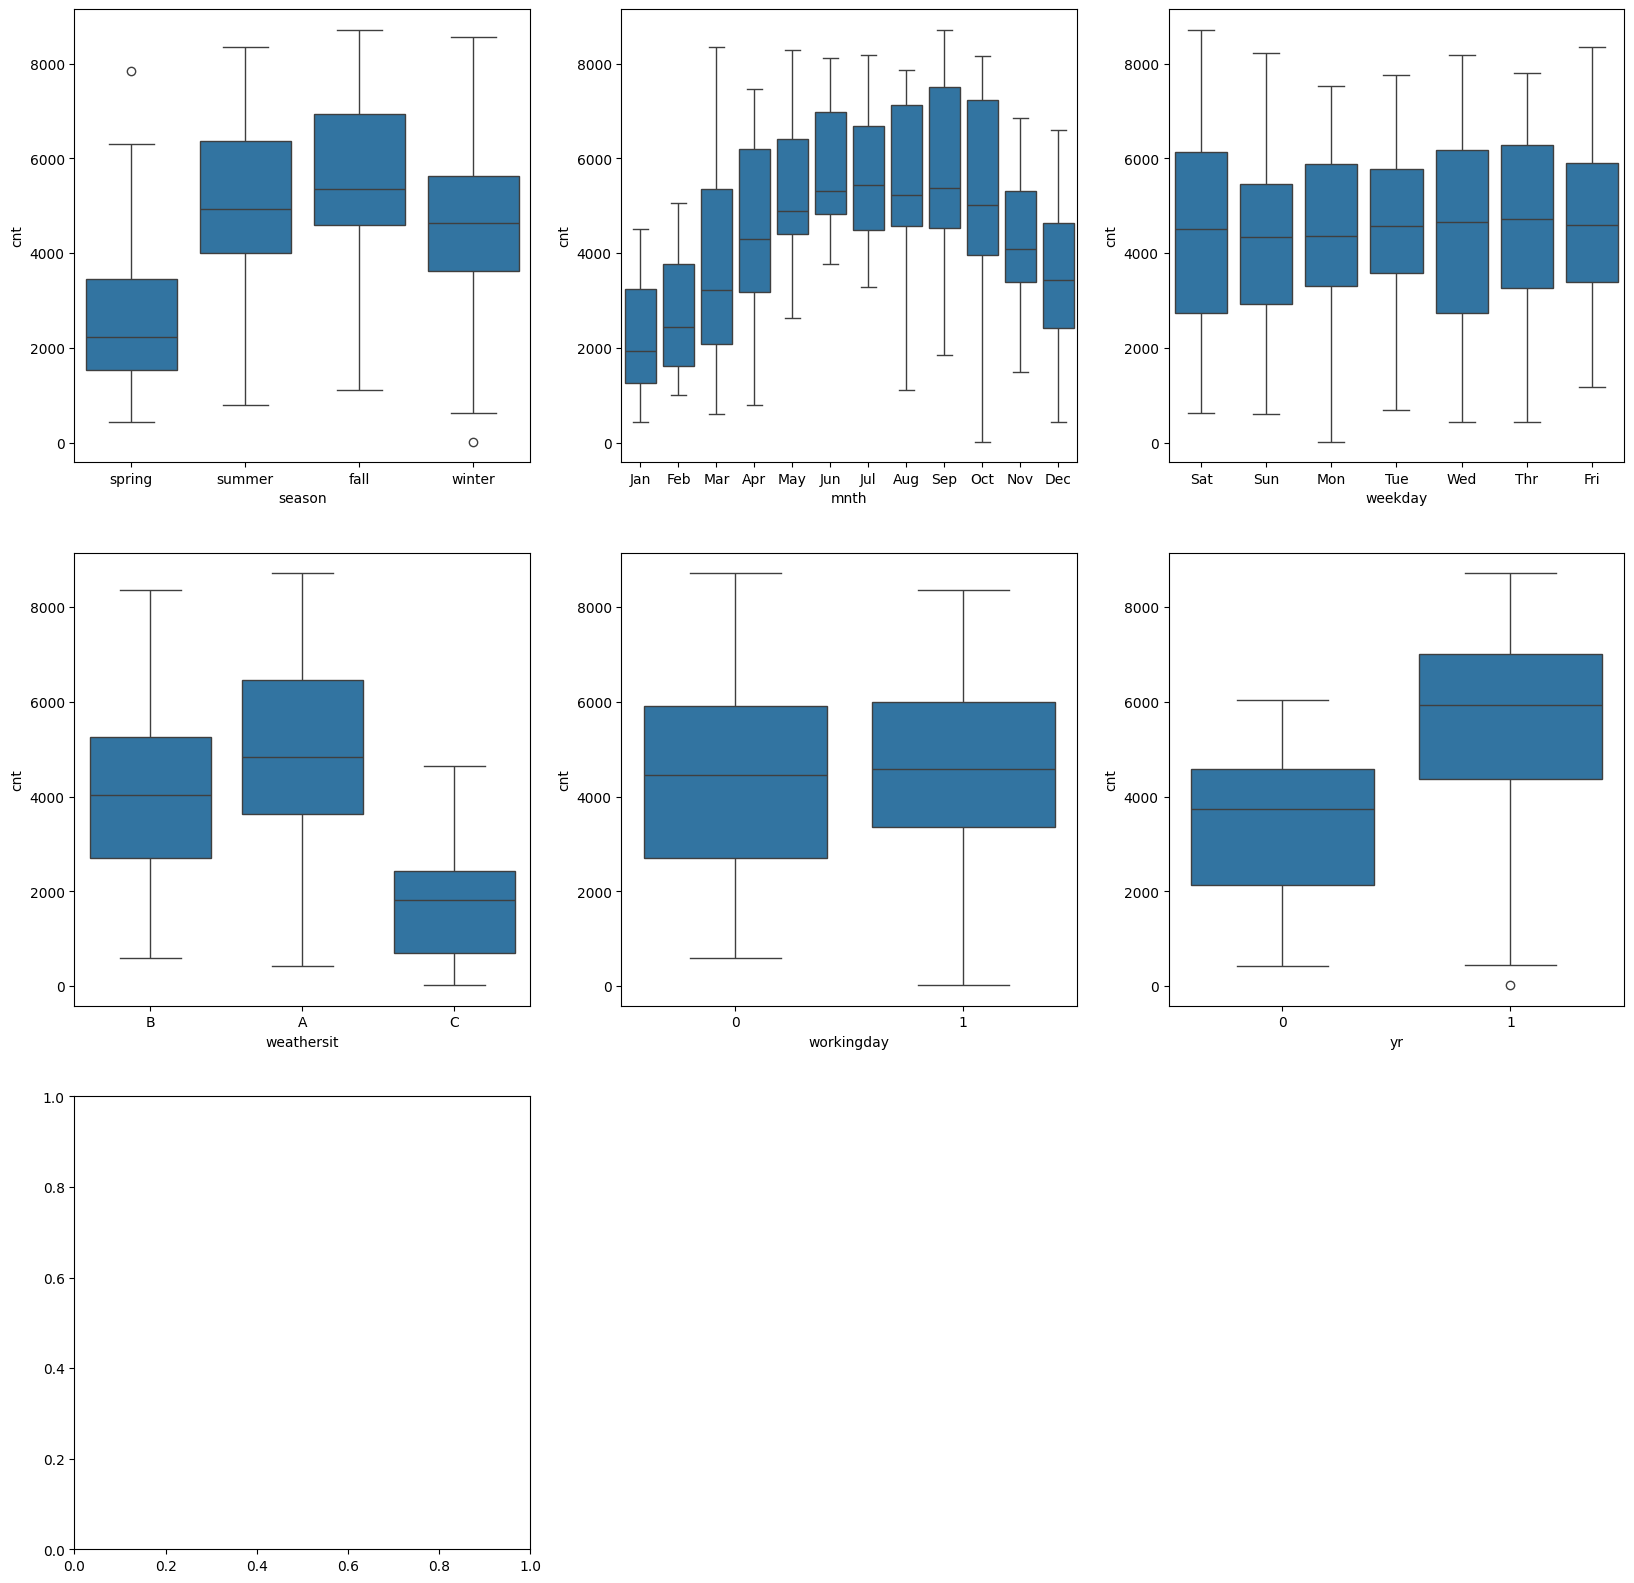

In [31]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = dataset)
plt.subplot(3,3,7)
plt.show()

In [32]:
intVarlist = ['casual', 'registered', 'cnt']
for var in intVarlist:
    dataset[var] = dataset[var].astype('float')

In [33]:
dataset_numeric = dataset.select_dtypes(include = ['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


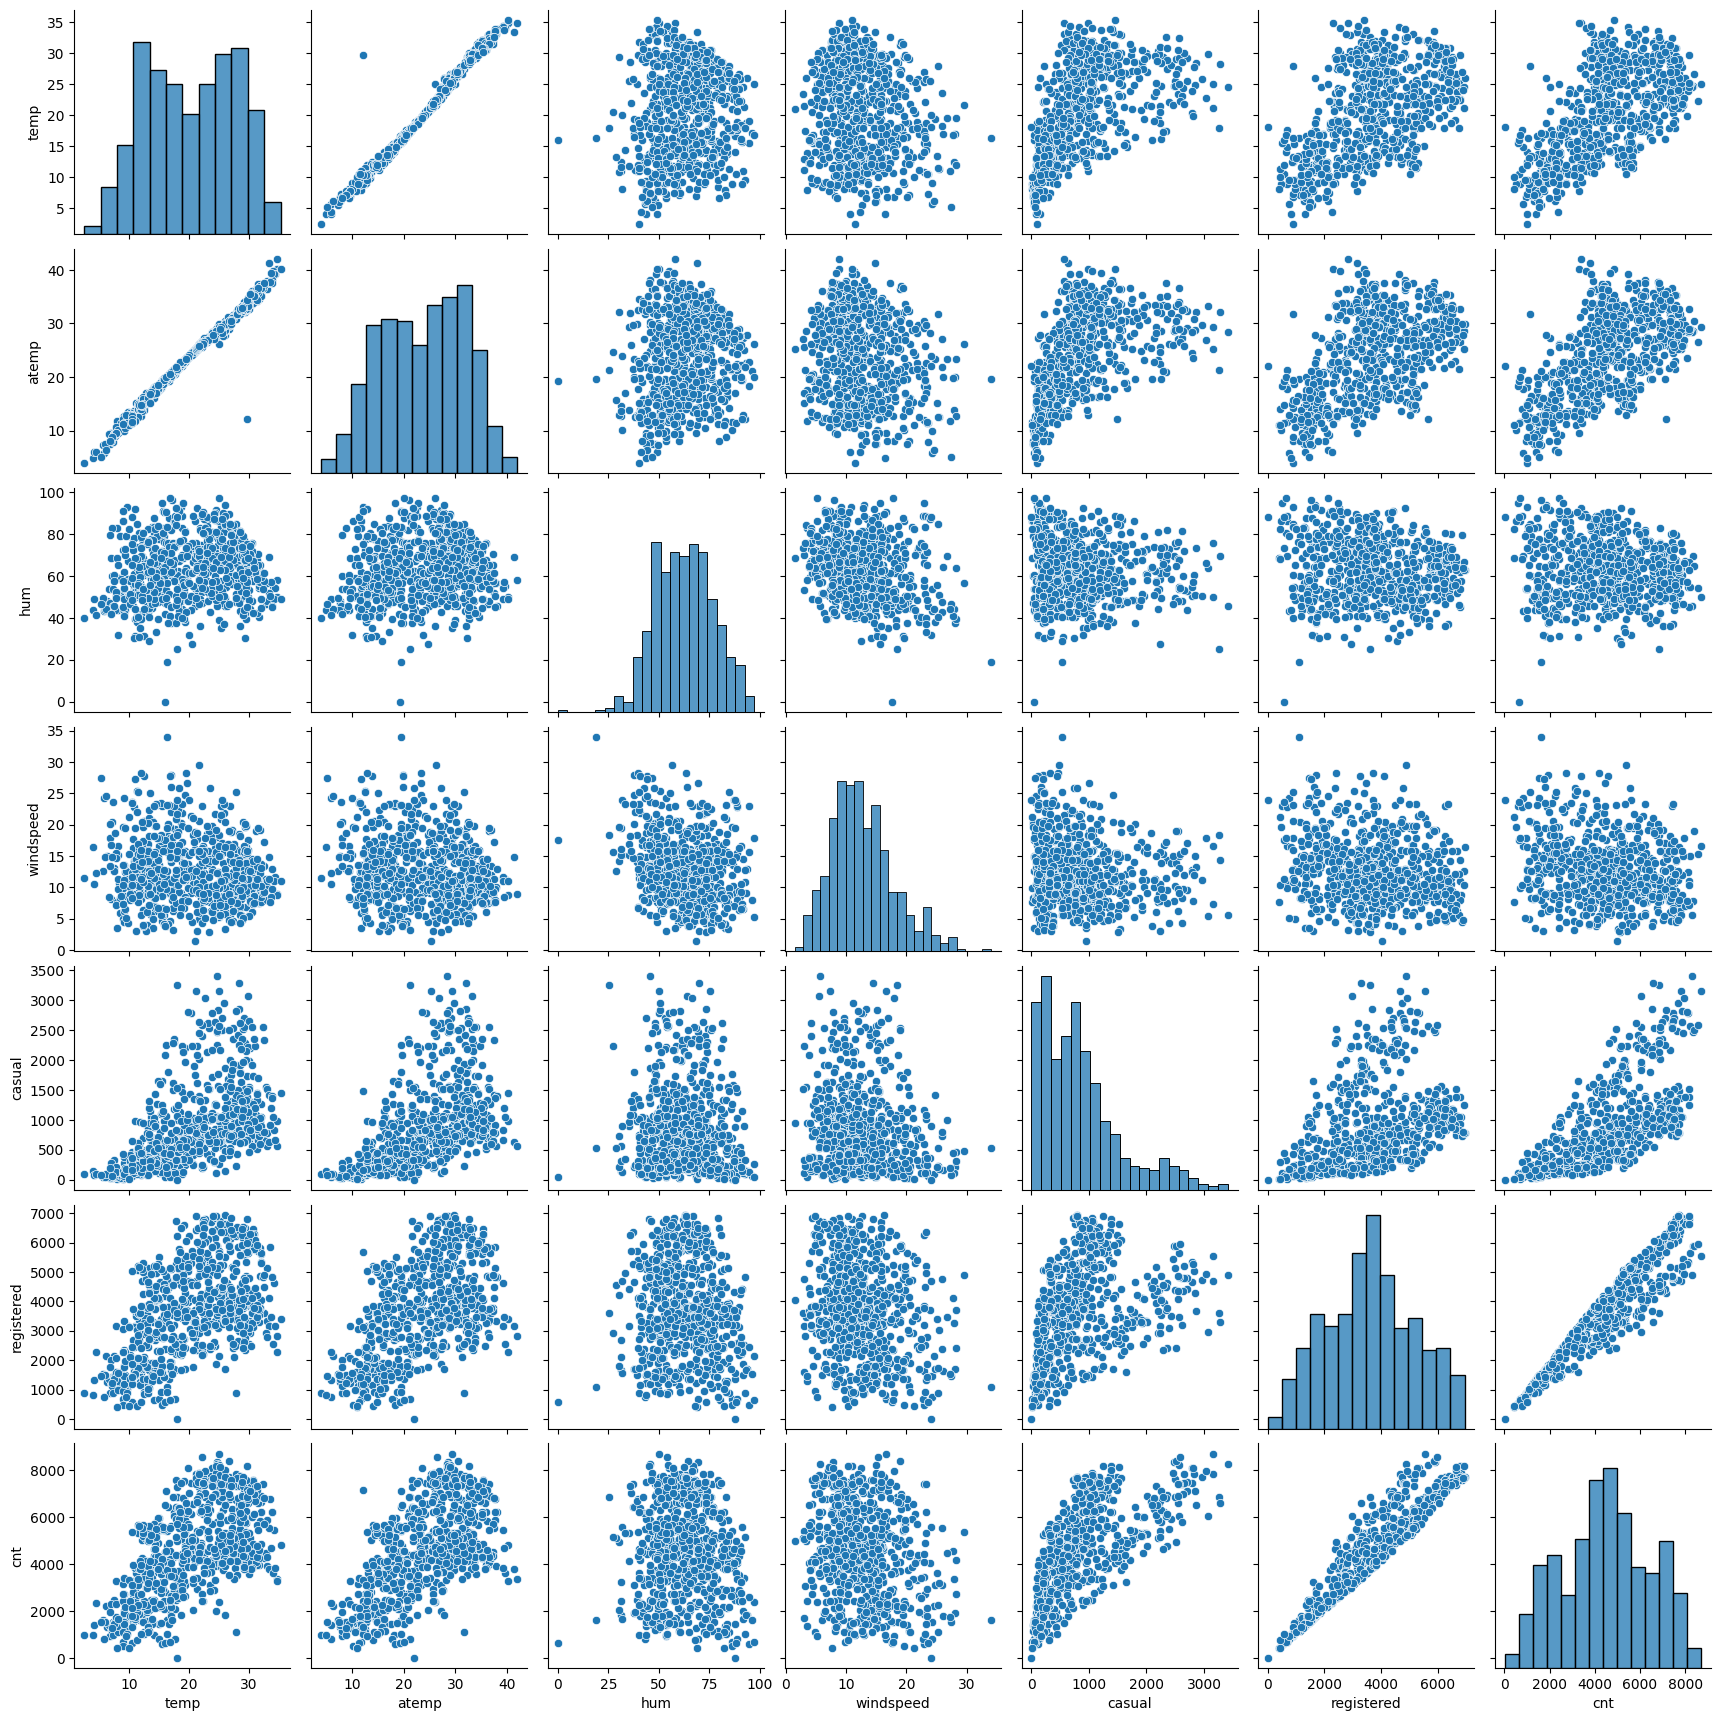

In [34]:
sns.pairplot(dataset_numeric)
plt.show()

In [35]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

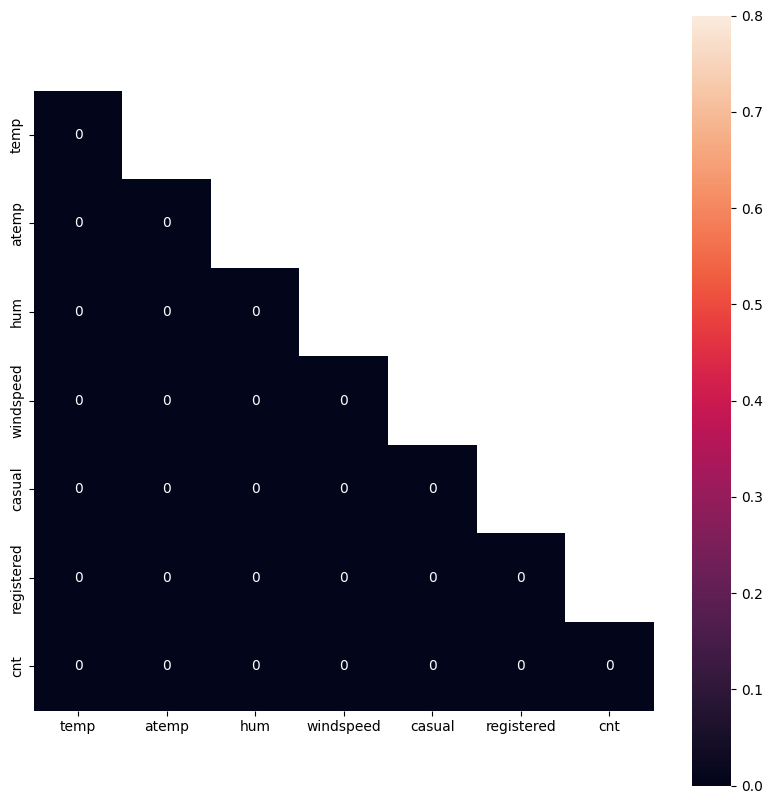

In [36]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(cor, mask=mask, vmax=0.8, square=True, annot=True)

In [37]:
dataset.drop('atemp', axis=1, inplace = True)

In [38]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## Data Preparation

In [39]:
dataset_categorical = dataset.select_dtypes(include = ['object'])

In [40]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A


In [41]:
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first = True)

In [42]:
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [43]:
dataset = dataset.drop(list(dataset_categorical.columns), axis = 1)

In [44]:
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [45]:
dataset = pd.concat([dataset, dataset_dummies], axis=1)

In [46]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,False,False,False,True,False,False,False,False,True,False
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,False,False,False,False,True,False,False,False,True,False
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,False,False,True,False,False,False,False,False,False,False
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,False,False,False,False,False,False,True,False,False,False
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,False,False,False,False,False,False,False,True,False,False


In [47]:
dataset = dataset.drop(['instant', 'dteday'], axis=1, inplace=False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,False,False,False,True,False,False


## Model Building & Evaluation

In [48]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,False,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,True,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,True,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,False,...,False,False,True,False,False,False,False,False,True,False
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,False,...,False,False,False,False,False,True,False,False,False,False
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,True,...,False,False,False,False,False,False,False,True,False,False
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,False,...,False,False,False,True,False,False,False,False,True,False


In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
var = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [55]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


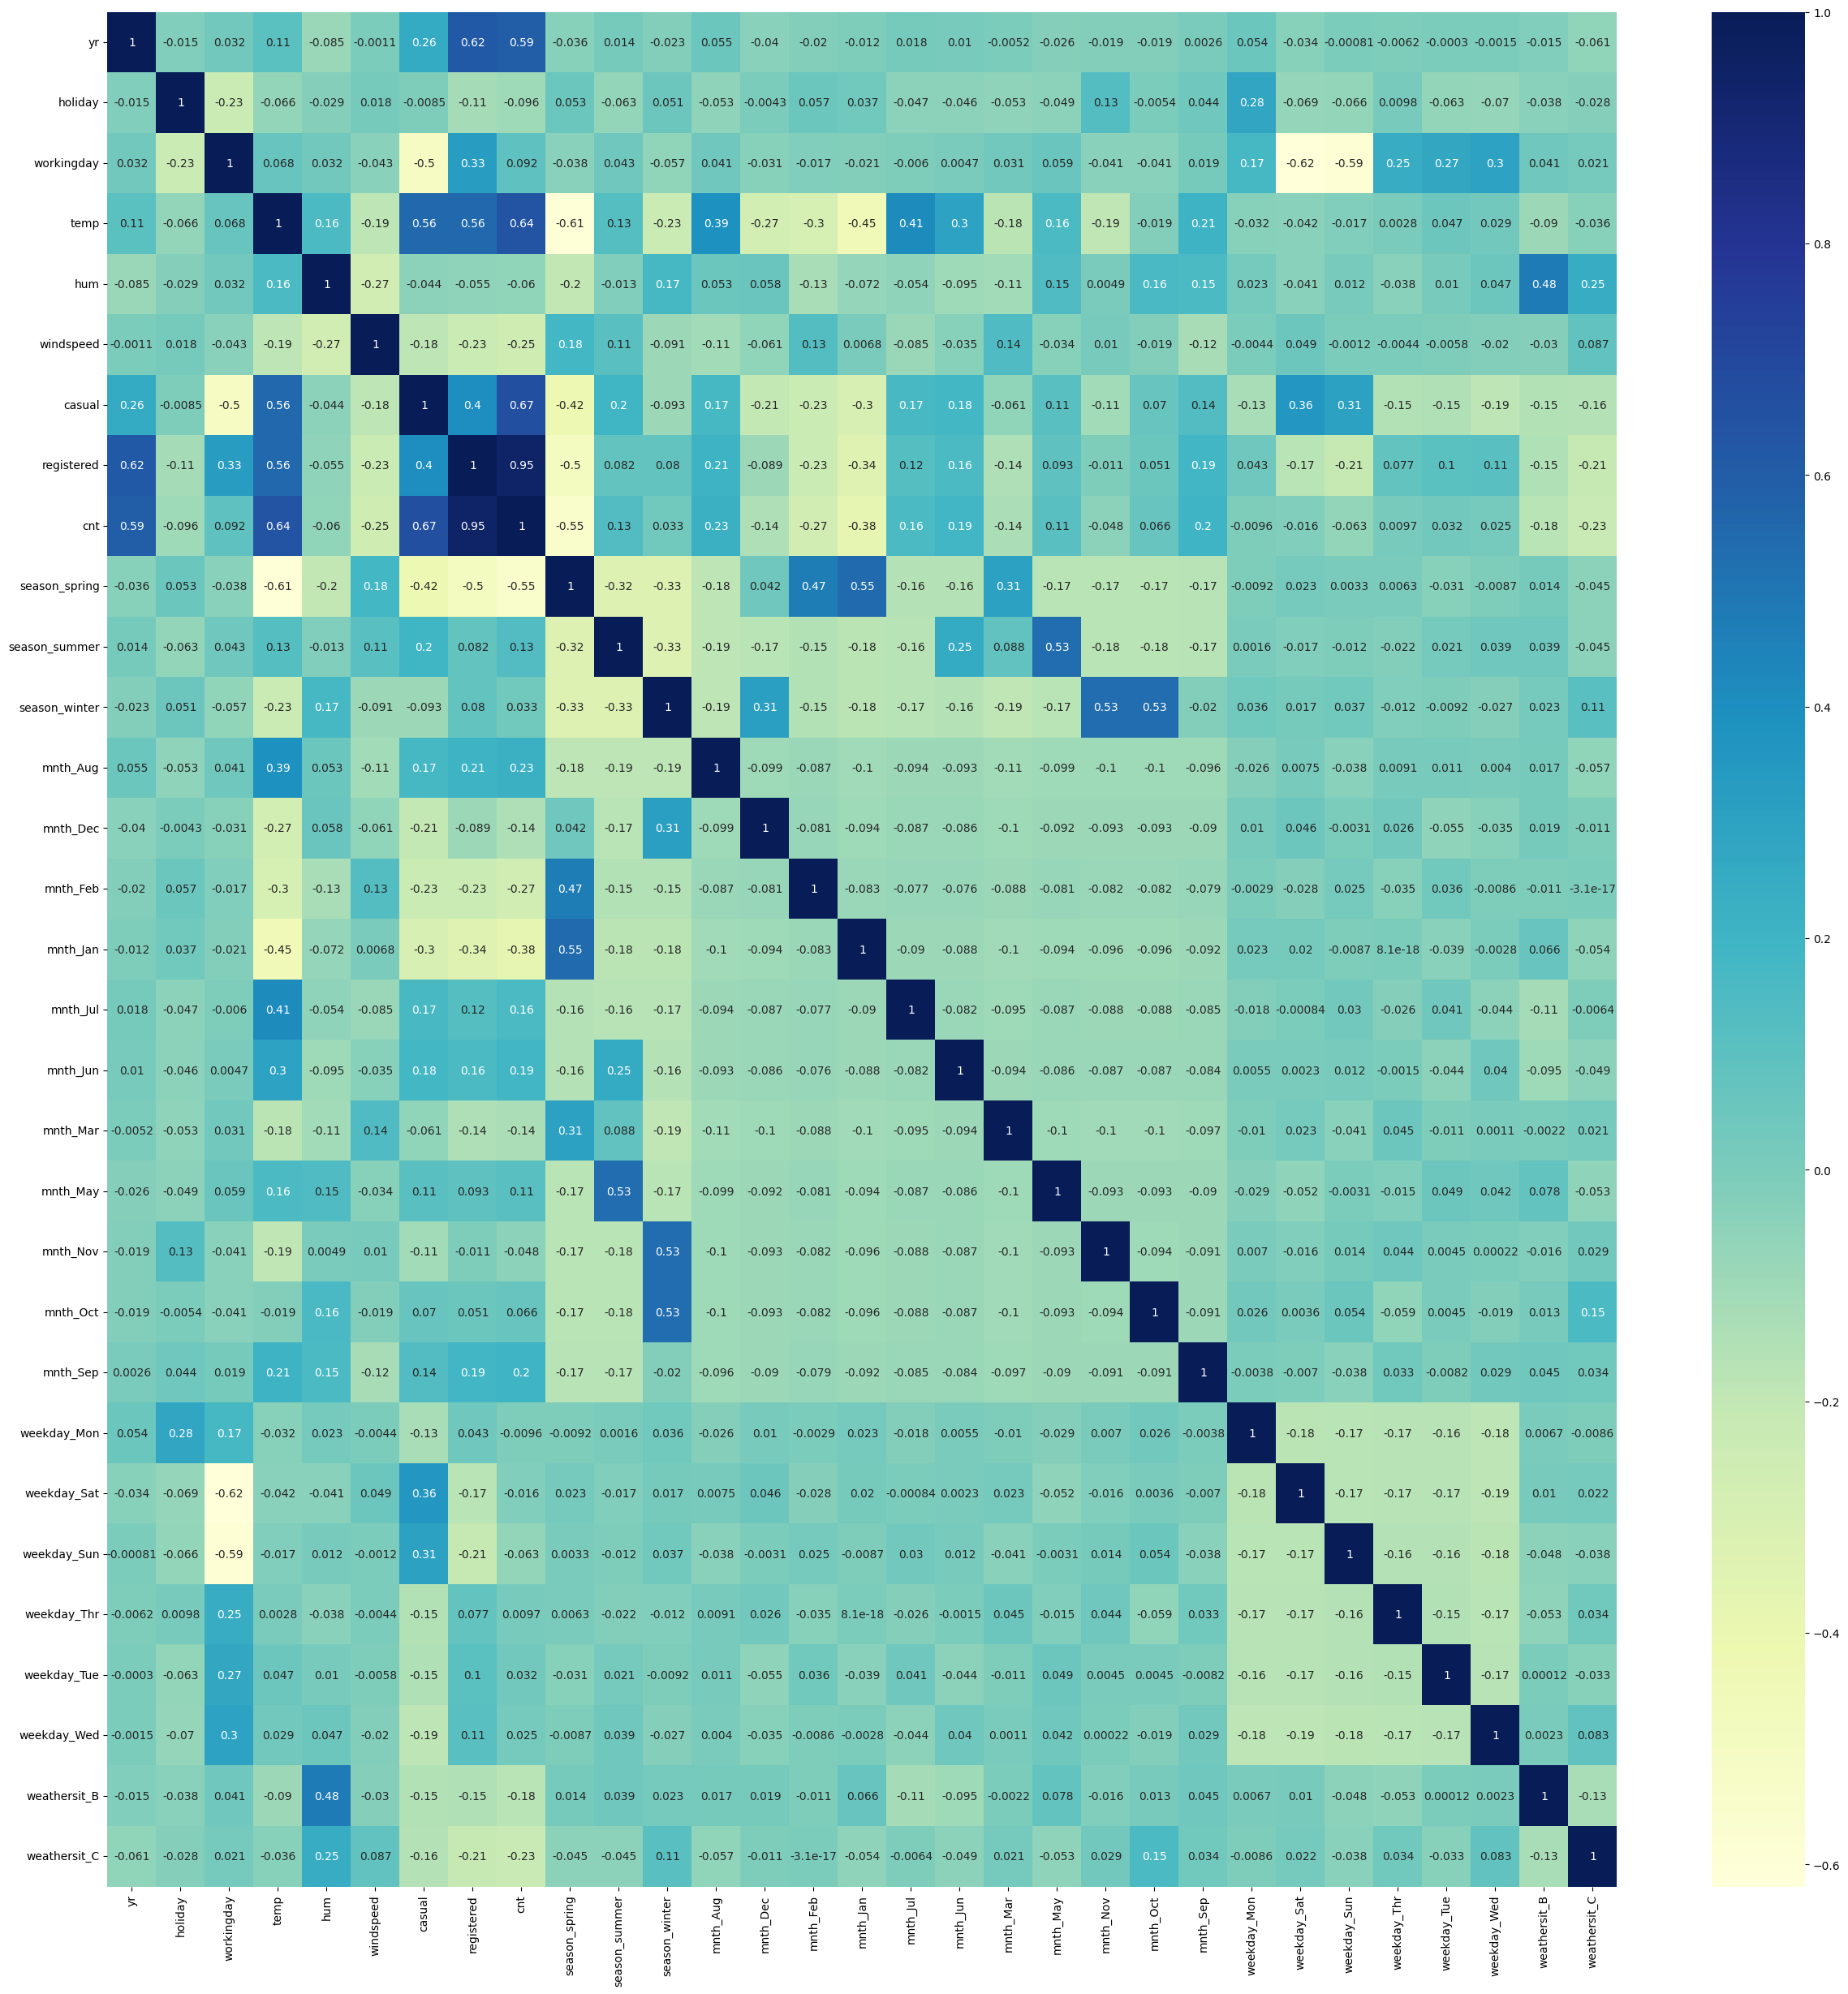

In [56]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [57]:
x_train = df_train.drop(['casual', 'registered'], axis = 1)
y_train = df_train.pop('cnt')

In [58]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,False,False,True,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,True,False,False,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [59]:
np.array(df_train)

array([[1, 0, 1, ..., False, False, False],
       [1, 0, 1, ..., False, False, False],
       [1, 0, 0, ..., False, True, False],
       ...,
       [0, 0, 1, ..., True, False, False],
       [0, 0, 0, ..., False, True, False],
       [0, 0, 1, ..., False, True, False]], dtype=object)

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')

In [64]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

## Data Understanding and Exploration

In [ ]:
lr.params

In [67]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [68]:
print(lm.coef_)
print(lm.intercept_)

[ 6.78216278e-16  2.22044605e-16  5.51788579e-16  1.44415758e-15
 -4.84253213e-16 -4.74320590e-16  1.00000000e+00  3.43979696e-16
  6.97686675e-17  1.98030315e-16  2.62708763e-16 -9.58749799e-17
 -4.98625695e-17  9.59038005e-18 -3.59052740e-17 -3.60588190e-17
  3.07572737e-17 -1.87186350e-16 -1.07836144e-16 -6.64964499e-17
  2.23723602e-16 -1.16225176e-17  3.38745510e-16  3.08344538e-16
 -7.09797931e-17 -5.68419582e-17 -1.65300448e-16 -3.21112366e-16
 -2.02334894e-16]
-2.220446049250313e-16


In [69]:
lr.summary

NameError: name 'lr' is not defined

In [70]:
from sklearn.feature_selection import RFE

In [71]:
lm = LinearRegression()

In [72]:
rfe1 = RFE(estimator=lm, n_features_to_select=15)
rfe1.fit(x_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[False False  True  True  True False  True  True False  True False False
 False False False  True False  True False False  True  True  True  True
  True False  True False  True]
[ 5  7  1  1  1 11  1  1  3  1  6 13  9 15  4  1  8  1 14 10  1  1  1  1
  1 12  1  2  1]


In [73]:
col1 = x_train.columns[rfe1.support_]

In [74]:
col1

Index(['workingday', 'temp', 'hum', 'cnt', 'season_spring', 'season_winter',
       'mnth_Jun', 'mnth_May', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thr', 'weekday_Wed', 'weathersit_C'],
      dtype='object')

In [75]:
X_train_rfe1 = x_train[col1]

x_train_lm = sm.add_constant(X_train_rfe1)
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
lm1.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [76]:
a = x_train_rfe1.drop('const', axis=1)

NameError: name 'x_train_rfe1' is not defined

In [77]:
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

NameError: name 'a' is not defined

In [78]:
lm = LinearRegression()

In [80]:
rfe2 = RFE(estimator=lm, n_features_to_select=7)

rfe2.fit(x_train, y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[False False False False  True False  True False False False False False
 False False False False False  True False False  True  True  True False
 False False False False  True]
[13 15  2  4  1 19  1  8 11  3 14 21 17 23 12  7 16  1 22 18  1  1  1  6
  5 20  9 10  1]


In [81]:
col1 = x_train.columns[rfe1.support_]

In [82]:
x_train_rfe1 = x_train[col1]
x_train_rfe1 = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
lm1.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [83]:
b = x_train_rfe2.drop('const', axis=1)
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = 'VIF', ascending = False)
vif1

NameError: name 'x_train_rfe2' is not defined

In [84]:
y_train_cnt = lm2.predict(x_train_rfe2)

NameError: name 'lm2' is not defined

In [85]:
fig = plt.figure()
sns.distplot((y_train, y_train_cnt), bins=20)

NameError: name 'y_train_cnt' is not defined

<Figure size 640x480 with 0 Axes>

In [86]:
df_test[var] = scaler.transform(df_test[var])

In [88]:
y_test = df_test.pop('cnt')
x_test = df_test.drop(['casual', 'registered'], axis=1)

KeyError: 'cnt'

In [89]:
x_test.head()

NameError: name 'x_test' is not defined

In [90]:
c = x_train_rfe2.drop('const', axis=1)

NameError: name 'x_train_rfe2' is not defined

In [92]:
cols2 = c.columns

NameError: name 'c' is not defined

In [93]:
x_test_rfe2 = x_test[col2]

NameError: name 'x_test' is not defined

In [94]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

NameError: name 'x_test_rfe2' is not defined

In [95]:
x_test_rfe2.info()

NameError: name 'x_test_rfe2' is not defined

In [96]:
y_pred = lm2.predict(x_test_rfe2)

NameError: name 'lm2' is not defined

In [97]:
plt.figure()
plt.scatter(y_test, y_pred)

NameError: name 'y_pred' is not defined

<Figure size 640x480 with 0 Axes>

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

NameError: name 'y_pred' is not defined